<a href="https://colab.research.google.com/github/bavel4885/python_test/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet CNN(Convolution Neural Network) 구현하기 with keras

## 1. 모듈 import

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras import datasets, layers, models, losses
from tensorflow.keras.optimizers import Adam,RMSprop
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import backend

## 2. keras에서 제공하는 데이터셋 MNIST 불러오기

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

## 3. 데이터셋 로드

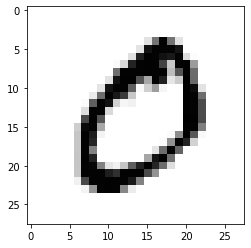

In [3]:
plt.imshow(x_train[1], cmap='Greys')

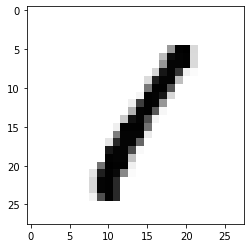

In [4]:
plt.imshow(x_train[3], cmap='Greys')

## 4. 이미지 크기 조정
* 원본 LeNet 모델은 32x32 이미지를 input 받습니다.그렇기 때문에 28x28 MNIST 이미지를 패딩하여 32x32이미지로 변경해줍니다.


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train.shape

(60000, 28, 28)

In [6]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255 # [0,0] : 배치 크기 , [2,2] : [top, bottom], [2,2] : [Right,left]
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

## 5. 채널 정보 추가


*   대부분의 CNN은 배치 크기, 높이, 너비 및 채널 차원을 갖는 입력으로 4차원 텐서를 허용받습니다.
* MNIST 이미지는 회색조이기 때문에 마지막 차원이 반드시 존재하지 않아도 됩니다.
* 텐서를 확장하고 축 번호 3에 더미 차원을 만듭니다.


In [7]:
x_train = x_train[:, :, :,np.newaxis,]
x_test = x_test[:, :, :, np.newaxis]
x_train.shape

TensorShape([60000, 32, 32, 1])

## 6. Validation set 
* train : Validation  = 8 :2
* Validation set은 주로 모델의 하이퍼파라미터 조정을 위해 사용됩니다.
* 모델 개발 시 검증 분할을 사용하는 것이 좋습니다.
* 훈련에 이미지의 80%를 사용하고 검증에 20%를 사용합니다.

In [8]:
x_val = x_train[int(-(x_train.shape[0]*0.8)):,:,:,:] 
y_val = y_train[int(-(x_train.shape[0]*0.8)):] 
x_train = x_train[:int(-(x_train.shape[0]*0.8)),:,:,:] 
y_train = y_train[:int(-(x_train.shape[0]*0.8))]
train_y = to_categorical(y_train, 10)
test_y = to_categorical(y_test, 10)

In [9]:
train_y.shape

(50400, 10)

## 6. LeNet 모델 만들기




In [28]:
class LeNet:
  @staticmethod
  def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(6, 5, activation='tanh', padding='same',input_shape=input_shape))
    model.add(layers.AveragePooling2D(3,padding='same'))
    model.add(layers.Conv2D(16, 5, activation='tanh',padding='same'))
    model.add(layers.AveragePooling2D(3,padding='same'))
    model.add(layers.Conv2D(120, 5, activation='tanh',padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [29]:
model = LeNet.build(input_shape = (32, 32, 1), classes = 10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 11, 11, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 1920)             

### Sparse Categorical Crossentropy
- Multi-class calssification 즉 클래스가 여러 개인 다중 분류 문제에서 사용
- label이 정수 인코딩 된 형태 즉, label이 class index를 값으로 가질 때 사용


>ex) 예를 들어, 3 class classification 문제에서 label이 0 또는 1또는 2를 값으로 가질때 사용


- 모델의 마지막 레이어의 활성화 함수는 소프트맥스


In [30]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [31]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 1.2676 - accuracy: 0.6271 - val_loss: 0.6345 - val_accuracy: 0.7979
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.5759 - accuracy: 0.8122 - val_loss: 0.4624 - val_accuracy: 0.8579
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.4278 - accuracy: 0.8671 - val_loss: 0.3750 - val_accuracy: 0.8879
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.8836 - val_loss: 0.3314 - val_accuracy: 0.9058
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3189 - accuracy: 0.9023 - val_loss: 0.2959 - val_accuracy: 0.9154
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2899 - accuracy: 0.9083 - val_loss: 0.2919 - val_accuracy: 0.9146
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2575 - accuracy: 0.9239 - val_loss: 0.2521 - val_accuracy: 0.9275
Epoch 8/10
38/38 [=

In [14]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2016 - accuracy: 0.9392


## 7. 최종 정확도
* 최종정확도는 epoch가 거듭될수록 좋아지는것을 확인가능하다.

In [15]:
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

최종 정확도 : 93.91999840736389 %


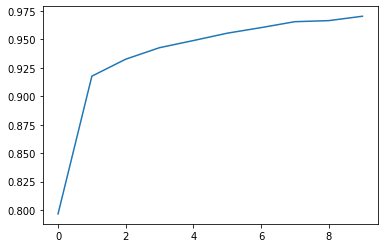

In [16]:
plt.plot(history.history['accuracy'])

* validation셋에 대한 정확도 확인가능하며, validation셋에 대한 정확도가 더 중요하다.

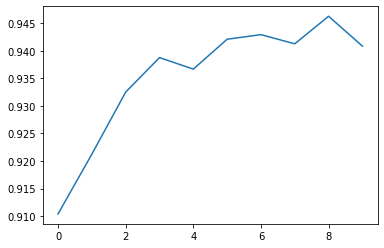

In [17]:
plt.plot(history.history['val_accuracy'])

In [18]:
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

최종 정확도 : 93.91999840736389 %


## 8. 여러가지 파라미터 교체


*   optimizer를 RMSprop
* activation function ReLu로 모델교체
* pool과 stride를 교체(2->3)



In [52]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = x_train[:, :, :,np.newaxis,]
x_test = x_test[:, :, :, np.newaxis]
x_val = x_train[int(-(x_train.shape[0]*0.8)):,:,:,:] 
y_val = y_train[int(-(x_train.shape[0]*0.8)):] 
x_train = x_train[:int(-(x_train.shape[0]*0.8)),:,:,:] 
y_train = y_train[:int(-(x_train.shape[0]*0.8))]
train_y = to_categorical(y_train, 10)
test_y = to_categorical(y_test, 10)

In [84]:
class LeNet:
  @staticmethod
  def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(6, 5, activation='relu', padding='same',input_shape=input_shape))
    model.add(layers.AveragePooling2D(1,padding='same'))
    model.add(layers.Conv2D(16, 5, activation='relu',padding='same'))
    model.add(layers.AveragePooling2D(1,padding='same'))
    model.add(layers.Conv2D(120, 5, activation='relu',padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_18 (Avera  (None, 7, 7, 6)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 7, 16)          2416      
                                                                 
 average_pooling2d_19 (Avera  (None, 2, 2, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_9 (Flatten)         (None, 480)              

In [85]:
model = LeNet.build(input_shape = (32, 32, 1), classes = 10)

### RMS prop , ReLU

In [86]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

In [87]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 3s 53ms/step - loss: 0.8903 - accuracy: 0.7757 - val_loss: 0.2343 - val_accuracy: 0.9250
Epoch 2/10
38/38 [==============================] - 2s 47ms/step - loss: 0.1635 - accuracy: 0.9507 - val_loss: 0.1436 - val_accuracy: 0.9604
Epoch 3/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.1476 - val_accuracy: 0.9554
Epoch 4/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0979 - val_accuracy: 0.9696
Epoch 5/10
38/38 [==============================] - 2s 48ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 2s 48ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0847 - val_accuracy: 0.9783
Epoch 7/10
38/38 [==============================] - 2s 48ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.1488 - val_accuracy: 0.9608
Epoch 8/10
38

In [88]:
score = model.evaluate(x_test, y_test, verbose=1)
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

313/313 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9793
최종 정확도 : 97.93000221252441 %


Adam, ReLU

In [81]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [82]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 1s 12ms/step - loss: 0.6160 - accuracy: 0.7994 - val_loss: 0.5622 - val_accuracy: 0.8150
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.5383 - accuracy: 0.8256 - val_loss: 0.5145 - val_accuracy: 0.8179
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.8436 - val_loss: 0.4746 - val_accuracy: 0.8492
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4479 - accuracy: 0.8556 - val_loss: 0.4562 - val_accuracy: 0.8558
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4133 - accuracy: 0.8696 - val_loss: 0.4554 - val_accuracy: 0.8429
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3949 - accuracy: 0.8746 - val_loss: 0.4031 - val_accuracy: 0.8696
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3694 - accuracy: 0.8828 - val_loss: 0.4156 - val_accuracy: 0.8667
Epoch 8/10
38/38 [=

In [83]:
score = model.evaluate(x_test, y_test, verbose=1)
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8918
최종 정확도 : 89.17999863624573 %
